In [87]:
# Import dependencies
import pandas as pd
import numpy as np
import csv
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [88]:
# The path to our CSV file
kickstarter = "Resources/KickstarterData.csv"
# Read our Kickstarter data into pandas
kickstarter_df = pd.read_csv(kickstarter)
kickstarter_df.head()

,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,...,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions
0,1645666704,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",The Class Act Players Theatre Company Presents...,The Class Act Players put on another one of th...,1500.0,2925.0,successful,the-class-act-players-theatre-company-presents...,False,US,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
1,874638240,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",MR INCREDIBLE by Camilla Whitehill - VAULT Fes...,"A brand new play about love and entitlement, b...",2500.0,2936.0,successful,mr-incredible-by-camilla-whitehill-vault-festival,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
2,247074984,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",RUN,Yonni's pissed off in a world filled with scho...,1000.0,1200.0,successful,run-10,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
3,1941196813,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",9th International Meeting of Youth Theatre sap...,27. April bis 1. Mai 2016 in Brixen/Südtirol/I...,2000.0,2135.0,successful,9th-international-meeting-of-youth-theatre-sap...,False,IT,...,"{""country"":""IT"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN
4,421961595,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Get Conti to the Ed Fringe!,The Italia Conti 2nd years are going to Ed Fri...,1000.0,1250.0,successful,get-conti-to-the-ed-fringe,False,GB,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN


In [89]:
# Get a list of all of our columns for easy reference
kickstarter_df.columns

Index(['id', 'photo', 'name', 'blurb', 'goal', 'pledged', 'state', 'slug',
       'disable_communication', 'country', 'currency', 'currency_symbol',
       'currency_trailing_code', 'deadline', 'state_changed_at', 'created_at',
       'launched_at', 'staff_pick', 'is_starrable', 'backers_count',
       'static_usd_rate', 'usd_pledged', 'creator', 'location', 'category',
       'profile', 'spotlight', 'urls', 'source_url', 'friends', 'is_starred',
       'is_backing', 'permissions'],
      dtype='object')

In [90]:
# Extract "name", "goal", "pledged", "state", "country", "staff_pick",
# "backers_count", and "spotlight"
reduced_kickstarter_df = kickstarter_df.loc[:,["name", "goal", "pledged", "state", "country", "staff_pick", "backers_count", "spotlight" ]]
reduced_kickstarter_df.head()

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight
0,The Class Act Players Theatre Company Presents...,1500.0,2925.0,successful,US,False,17,True
1,MR INCREDIBLE by Camilla Whitehill - VAULT Fes...,2500.0,2936.0,successful,GB,True,15,True
2,RUN,1000.0,1200.0,successful,GB,False,30,True
3,9th International Meeting of Youth Theatre sap...,2000.0,2135.0,successful,IT,False,24,True
4,Get Conti to the Ed Fringe!,1000.0,1250.0,successful,GB,False,28,True


In [91]:
# Sort out any projects that made no money at all
# reduced_kickstarter_df = reduced_kickstarter_df.loc[(reduced_kickstarter_df["pledged"] > 0)]
pledged_df = reduced_kickstarter_df.loc[(reduced_kickstarter_df["pledged"] == 0)]
pledged_df.head()

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight
560,Classroommate - Smart Management with G Suite ...,500000.0,0.0,canceled,HK,False,0,False
561,Project Salmon (Canceled),10000.0,0.0,canceled,US,False,0,False
563,Clinical Documentation Specialist Tool (Canceled),9500.0,0.0,canceled,US,False,0,False
564,Epichino is going to change the world (Canceled),375000.0,0.0,canceled,US,False,0,False
565,"""Just Say"" Voice messages on facebook, twitter...",10000.0,0.0,suspended,US,False,0,False


In [92]:
# Collect only those projects that were hosted in the US
US_df = reduced_kickstarter_df.loc[(reduced_kickstarter_df["country"] == "US")]
US_df.head()

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight
0,The Class Act Players Theatre Company Presents...,1500.0,2925.0,successful,US,False,17,True
8,Forefront Festival 2015,7200.0,7230.0,successful,US,False,68,True
11,Hamlet the Hip-Hopera,9747.0,10103.0,successful,US,True,132,True
14,Pride Con,15000.0,15110.0,successful,US,False,60,True
15,En Garde Arts Emerging Artists Festival BOSSS,10000.0,10306.0,successful,US,True,80,True


In [93]:
# Create a new column that finds the average amount pledged to a project
US_df["average_donation"] = US_df['pledged']/US_df['backers_count']
US_df.head()

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight,average_donation
0,The Class Act Players Theatre Company Presents...,1500.0,2925.0,successful,US,False,17,True,172.058824
8,Forefront Festival 2015,7200.0,7230.0,successful,US,False,68,True,106.323529
11,Hamlet the Hip-Hopera,9747.0,10103.0,successful,US,True,132,True,76.537879
14,Pride Con,15000.0,15110.0,successful,US,False,60,True,251.833333
15,En Garde Arts Emerging Artists Festival BOSSS,10000.0,10306.0,successful,US,True,80,True,128.825000


In [94]:
# Format our "average_donation", "goal", and "pledged" columns, round to two decimal places
US_df["average_donation"] = US_df["average_donation"].map("$ {:,.2f}".format)
US_df["goal"] = US_df["goal"].map("$ {:,.2f}".format)
US_df["pledged"] = US_df["pledged"].map("$ {:,.2f}".format)
US_df.head()

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight,average_donation
0,The Class Act Players Theatre Company Presents...,"$ 1,500.00","$ 2,925.00",successful,US,False,17,True,$ 172.06
8,Forefront Festival 2015,"$ 7,200.00","$ 7,230.00",successful,US,False,68,True,$ 106.32
11,Hamlet the Hip-Hopera,"$ 9,747.00","$ 10,103.00",successful,US,True,132,True,$ 76.54
14,Pride Con,"$ 15,000.00","$ 15,110.00",successful,US,False,60,True,$ 251.83
15,En Garde Arts Emerging Artists Festival BOSSS,"$ 10,000.00","$ 10,306.00",successful,US,True,80,True,$ 128.82


In [95]:
# Calculate the total number of backers for all US projects
total_US_backers = US_df['backers_count'].sum()
total_US_backers

89273

In [96]:
# Calculate the average number of backers for all US projects
avg_US_backers = US_df['backers_count'].mean()
avg_US_backers

33.82834406972338

In [97]:
# Collect only those US campaigns that have been picked as a "Staff Pick"
staff_pick = US_df.loc[US_df["staff_pick"] == True]
staff_pick

,name,goal,pledged,state,country,staff_pick,backers_count,spotlight,average_donation
11,Hamlet the Hip-Hopera,"$ 9,747.00","$ 10,103.00",successful,US,True,132,True,$ 76.54
15,En Garde Arts Emerging Artists Festival BOSSS,"$ 10,000.00","$ 10,306.00",successful,US,True,80,True,$ 128.82
39,"""Poor People"" at FringeNYC 2015","$ 5,500.00","$ 5,682.00",successful,US,True,34,True,$ 167.12
44,Queen Mab's Steampunk and Fairie Street Festival,"$ 1,300.00","$ 3,363.00",successful,US,True,62,True,$ 54.24
45,RAFT: a new play by Emily Kitchens,"$ 7,500.00","$ 7,826.00",successful,US,True,120,True,$ 65.22
47,The Spinning Wheel: a son remixes a father's r...,"$ 20,000.00","$ 22,602.00",successful,US,True,228,True,$ 99.13
50,Bloomers Presents: LaughtHERfest,"$ 8,000.00","$ 9,501.00",successful,US,True,102,True,$ 93.15
54,Natasha Noman's Noman's Land | Aug 5-15th Edi...,"$ 7,000.00","$ 7,571.00",successful,US,True,84,True,$ 90.13
107,Peter/Wendy goes to the 2015 Edinburgh Fringe ...,"$ 10,000.00","$ 12,003.00",successful,US,True,95,True,$ 126.35
115,La Lune de Femme goes to New Orleans Fringe,"$ 5,000.00","$ 5,519.00",successful,US,True,79,True,$ 69.86


In [98]:
# Group by the state of the campaigns and see if staff picks matter
state_groupby = staff_pick.groupby("state")
state_groupby["name"].count()

state
canceled        6
failed         21
live            2
successful    145
Name: name, dtype: int64

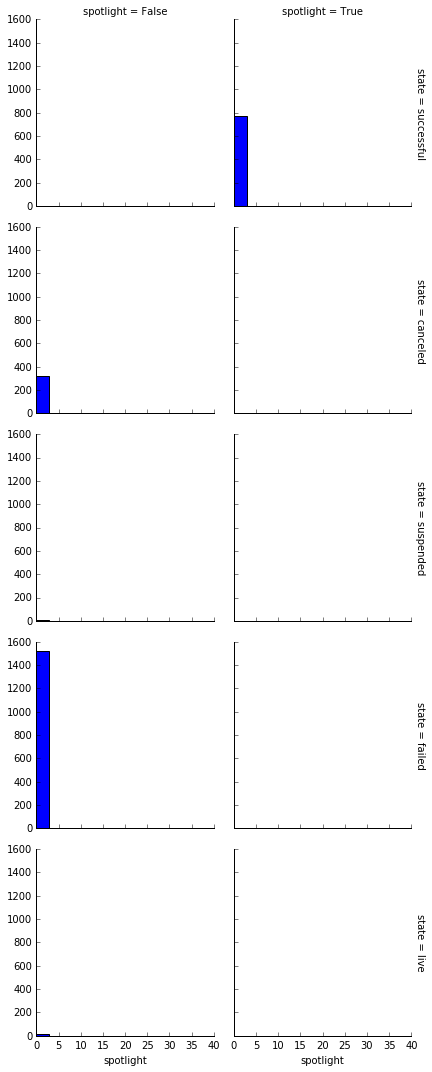

In [101]:
grid = sns.FacetGrid(US_df, row="state", col="spotlight", margin_titles=True)
grid.map(plt.hist, "spotlight", bins=np.linspace(0, 40, 15));

In [99]:
# Convert strings to floats for later visualizations
US_df['pledged'] = US_df['pledged'].str.replace('$','')
US_df['pledged'] = US_df['pledged'].str.replace(' ','')
US_df['pledged'] = US_df['pledged'].str.replace(',','')
US_df['pledged'] = US_df['pledged'].astype(float)
#US_df.head